In [78]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from PIL import Image, UnidentifiedImageError
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [79]:
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
path_to_dataset = parent_path+"/Dataset/PetImages"
cat_dir = path_to_dataset + "/" + 'Cat'
dog_dir = path_to_dataset + "/" + 'Dog'
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

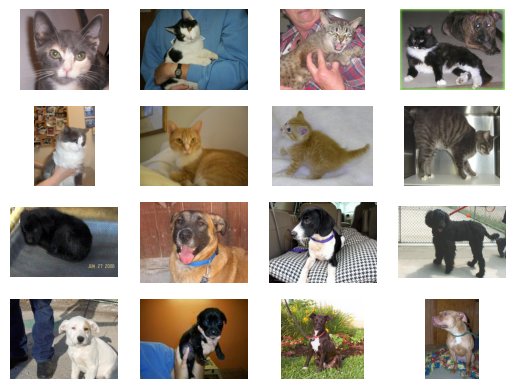

In [80]:
pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [81]:
base_dir = parent_path + "/Dataset/PetImages"

def is_tf_decodable(path):
    try:
        img_bytes = tf.io.read_file(path)
        _ = tf.image.decode_image(img_bytes)
        return True
    except:
        return False

for subfolder in ['Cat','Dog']:
    folder = os.path.join(base_dir, subfolder)
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        if not is_tf_decodable(path):
            print("Removing bad image:", path)
            os.remove(path)


Removing bad image: D:\Code\PragyaPythonProject\ImageWebsite\AIModel/Dataset/PetImages\Cat\10404.jpg
Removing bad image: D:\Code\PragyaPythonProject\ImageWebsite\AIModel/Dataset/PetImages\Cat\4351.jpg
Removing bad image: D:\Code\PragyaPythonProject\ImageWebsite\AIModel/Dataset/PetImages\Dog\11233.jpg
Removing bad image: D:\Code\PragyaPythonProject\ImageWebsite\AIModel/Dataset/PetImages\Dog\11912.jpg
Removing bad image: D:\Code\PragyaPythonProject\ImageWebsite\AIModel/Dataset/PetImages\Dog\2317.jpg
Removing bad image: D:\Code\PragyaPythonProject\ImageWebsite\AIModel/Dataset/PetImages\Dog\2494.jpg
Removing bad image: D:\Code\PragyaPythonProject\ImageWebsite\AIModel/Dataset/PetImages\Dog\9500.jpg


In [13]:
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 24991 files belonging to 2 classes.
Using 22492 files for training.
Found 24991 files belonging to 2 classes.
Using 2499 files for validation.


In [57]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    # Normalize input images
    layers.Rescaling(1./255, input_shape=(200, 200, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [58]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 757s 1s/step - accuracy: 0.6407 - loss: 0.6648 - val_accuracy: 0.7435 - val_loss: 0.5214
Epoch 2/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 854s 1s/step - accuracy: 0.7639 - loss: 0.4982 - val_accuracy: 0.8055 - val_loss: 0.4421
Epoch 3/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 815s 1s/step - accuracy: 0.8044 - loss: 0.4273 - val_accuracy: 0.8171 - val_loss: 0.4004
Epoch 4/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 831s 1s/step - accuracy: 0.8354 - loss: 0.3748 - val_accuracy: 0.8407 - val_loss: 0.3832
Epoch 5/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 858s 1s/step - accuracy: 0.8612 - loss: 0.3221 - val_accuracy: 0.7903 - val_loss: 0.4223
Epoch 6/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 817s 1s/step - accuracy: 0.8840 - loss: 0.2765 - val_accuracy: 0.8671 - val_loss: 0.3207
Epoch 7/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 774s 1s/step - accuracy: 0.9040 - loss: 0.2294 - val_accuracy: 0.7811 - val_loss: 0.5724
Epoch 8/10
703/703 ━━━━━━━━━━━━━━━━━━━━ 805s 1s/step - accuracy: 0.9242 - loss: 0.1882 - val_accu

In [59]:
model.save("my_model.keras")

In [60]:
saved_model = tf.keras.models.load_model("my_model.keras")

In [61]:
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [62]:
with open("history.pkl", "rb") as f:
    history_dict = pickle.load(f)

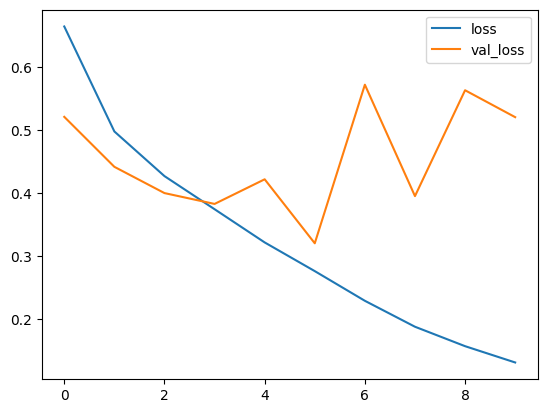

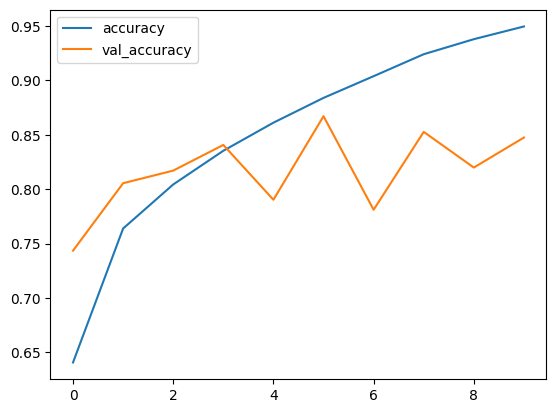

In [63]:
history_df = pd.DataFrame(history_dict)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [64]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = saved_model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Cat


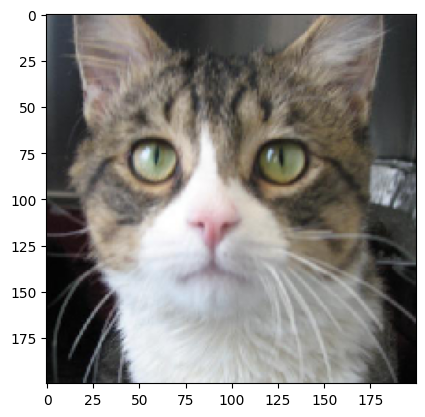

In [65]:
predict_image(cat_dir+"/"+'10877.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Dog


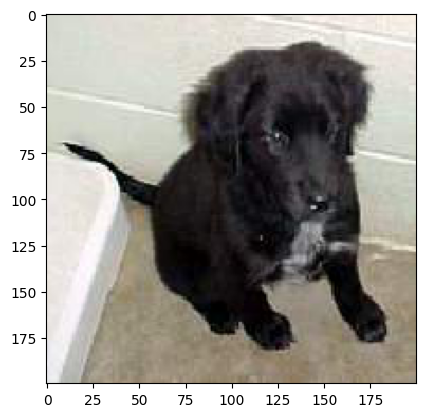

In [68]:
predict_image(dog_dir+"/"+'10115.jpg')

79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step


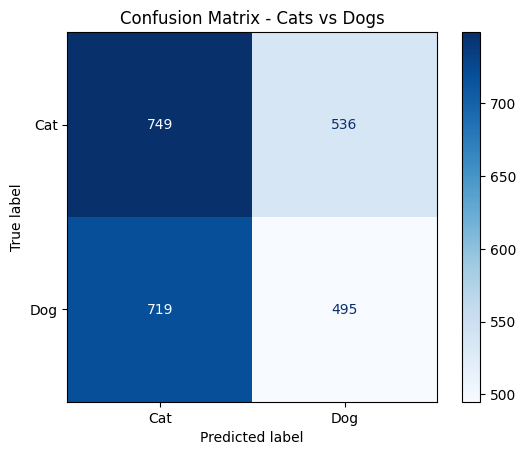

Classification Report:

              precision    recall  f1-score   support

         Cat       0.51      0.58      0.54      1285
         Dog       0.48      0.41      0.44      1214

    accuracy                           0.50      2499
   macro avg       0.50      0.50      0.49      2499
weighted avg       0.50      0.50      0.49      2499



In [71]:
# 1. Get predictions on validation data
y_pred = (model.predict(test_datagen) > 0.5).astype("int32").flatten()

# 2. Get true labels
y_true = np.concatenate([y for x, y in test_datagen], axis=0)

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Cats vs Dogs")
plt.show()

# 4. Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))